Изменяемые и неизменяемые типы данных

Типы данных в Python делятся на две категории:

изменяемые (list, set, dict, Массивы (array.array): Предоставляют возможность хранить элементы фиксированного типа и изменять их, Объекты пользовательских классов: Объекты, созданные на основе классов, могут быть изменяемыми, если они содержат изменяемые атрибуты.)
неизменяемые (int, float, bool, tuple, str, complex, frozenset, bytes)

Приведенный ниже код:
приводит к возникновению ошибки:

In [1]:
data = 'beegeek'
data[0] = 'B'

print(data)

TypeError: 'str' object does not support item assignment

поскольку строки (тип str) являются неизменяемыми.

Не забывайте, что все строковые методы возвращают новые объекты, а не изменяют исходные. Аналогичным образом работают методы других неизменяемых типов данных.

In [2]:
data = ['b', 'e', 'e', 'g', 'e', 'e', 'k']
data[0] = 'B'

print(data)

['B', 'e', 'e', 'g', 'e', 'e', 'k']


поскольку списки (тип list) являются изменяемыми.

Изменение объектов VS оператор присваивания

В Python существует два типа изменения:

присвоение переменной нового значения
непосредственное изменение объекта

In [3]:
nums = [1, 2, 3]

print(nums)
print(id(nums))

nums = [1, 2, 3] + [4]

print(nums)
print(id(nums))

[1, 2, 3]
1591533505344
[1, 2, 3, 4]
1591533381888


так как мы не изменяем исходный список, а создаем новый и присваиваем его прежней переменной.

In [4]:
nums = [1, 2, 3]

print(id(nums))
print(nums)

nums.append(4)

print(id(nums))
print(nums)

1591533505152
[1, 2, 3]
1591533505152
[1, 2, 3, 4]


так как мы единожды создаем список, а после изменяем его, добавляя в него новый элемент.

Таким образом, в первом случае мы изменяем переменную, то есть изменяем то, на какой объект она ссылается. Во втором случае мы изменяем сам объект, на который может ссылаться любое количество переменных.

Важно понимать, что во время изменения объекта, мы изменяем именно объект, а не переменные. Другими словами, если какая-либо другая переменная указывает на объект, который мы изменили, эта переменная также отразит это изменение, но не потому что изменилась переменная, а потому что изменился объект, на который она ссылается.

In [5]:
nums1 = [1, 2, 3]
nums2 = nums1

nums1.append(4)

print(nums1)
print(nums2)

[1, 2, 3, 4]
[1, 2, 3, 4]


Оператор присваивания в Python не создает копию объекта, он лишь связывает имя переменной с объектом. Для неизменяемых объектов это обычно не имеет значения, но для работы с изменяемыми объектами часто требуется создавать реальные копии.

Примечания

Примечание 1. Кортежи (тип tuple) являются неизменяемыми, однако если элементами кортежа являются изменяемые объекты, то мы можем изменить эти объекты.

In [11]:
data = (1, 'bee', [1, 2, 3], {'a': 1})

print(data)
print(hex(id(data)))
a = hex(id(data))

data[2][2] = 30
data[3]['b'] = 2

print(data)
print(hex(id(data)))
b = hex(id(data))
print(a == b)

(1, 'bee', [1, 2, 3], {'a': 1})
0x1728ed14180
(1, 'bee', [1, 2, 30], {'a': 1, 'b': 2})
0x1728ed14180
True


При этом важно понимать: меняются объекты, являющиеся элементами кортежа, а не кортеж. Кортеж лишь содержит ссылки на эти объекты, которые остаются прежними при изменении самих объектов.

Примечание 2. Python по-разному обрабатывает сложение списков с помощью операторов + и +=

In [12]:
nums1 = [1, 2, 3]
nums2 = nums1

nums1 = nums1 + [4, 5]

print(nums1)
print(nums2)

[1, 2, 3, 4, 5]
[1, 2, 3]


В данном случае оператор + создал новый список [1, 2, 3, 4, 5], который был присвоен переменной nums1, при этом nums2 по-прежнему указывает на старый список [1, 2, 3].

In [13]:
nums1 = [1, 2, 3]
nums2 = nums1

nums1 += [4, 5]

print(nums1)
print(nums2)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


В данном случае оператор += изменил текущий список, и эти изменения также видны в nums2. По сути, оператор += для списков работает как списочный метод extend().

Примечание 3. Считается плохой практикой использование изменяемых типов данных в качестве значений параметров по умолчанию, так как значение по умолчанию для параметра создается единожды при определении функции (обычно при загрузке модуля) и становится атрибутом (свойством) функции. Поэтому если значением по умолчанию является изменяемый объект, то его изменение повлияет на каждый следующий вызов функции.

In [14]:
def append(element, seq=[]):
    seq.append(element)
    return seq

print(append(10))
print(append(5))
print(append(1))
print(append(3))

[10]
[10, 5]
[10, 5, 1]
[10, 5, 1, 3]


Для решения проблемы можно использовать константу None в качестве значения параметра по умолчанию, а в теле функции устанавливать нужное значение:

In [15]:
def append(element, seq=None):
    if seq is None:
        seq = []
    seq.append(element)
    return seq

print(append(10))
print(append(5))
print(append(1))

[10]
[5]
[1]


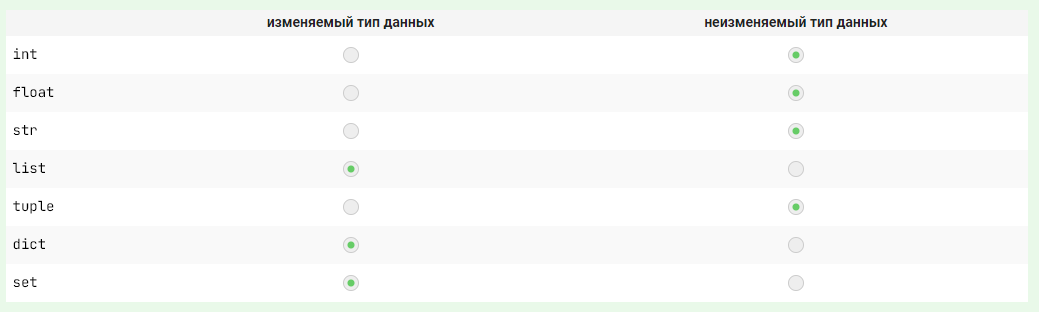

In [16]:
from functions import picture
picture('Без имени1.png')